In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

print("Data loaded successfully. Quick overview of the datasets:")
print("\
Customers head:")
print(customers_df.head())
print("\
Products head:")
print(products_df.head())
print("\
Transactions head:")
print(transactions_df.head())

Data loaded successfully. Quick overview of the datasets:
Customers head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products head:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions head:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024

The data has been successfully loaded, and the first few rows of each dataset have been displayed to confirm the structure and content. Next, I will proceed with exploratory data analysis (EDA) to uncover patterns and derive business insights.

In [ ]:
# Perform basic EDA to understand the data
# Checking for missing values, data types, and basic statistics
print("Customers dataset info:")
print(customers_df.info())
print("\
Products dataset info:")
print(products_df.info())
print("\
Transactions dataset info:")
print(transactions_df.info())

# Checking for missing values
print("\
Missing values in Customers dataset:")
print(customers_df.isnull().sum())
print("\
Missing values in Products dataset:")
print(products_df.isnull().sum())
print("\
Missing values in Transactions dataset:")
print(transactions_df.isnull().sum())

# Basic statistics for numerical columns
print("\
Basic statistics for Transactions dataset:")
print(transactions_df.describe())

Customers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transactions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Col

The datasets have been successfully loaded and checked for missing values, with no missing data found. Basic statistics for the transactions dataset have been generated. Next, I will proceed with detailed exploratory data analysis (EDA) to uncover patterns and derive business insights

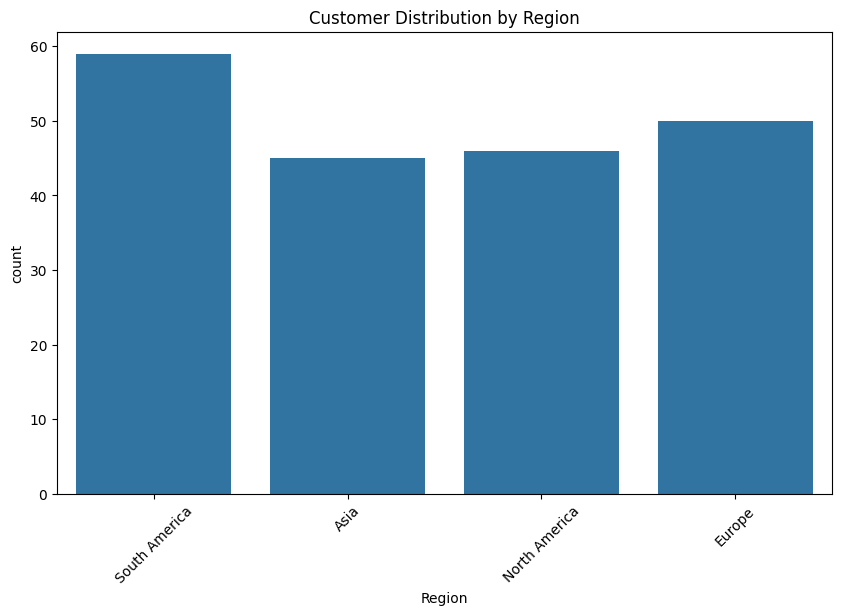

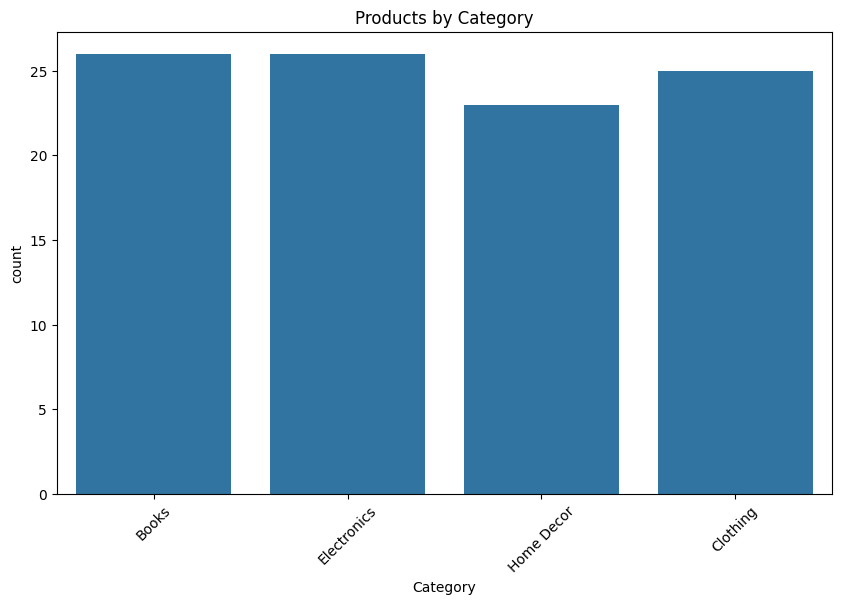

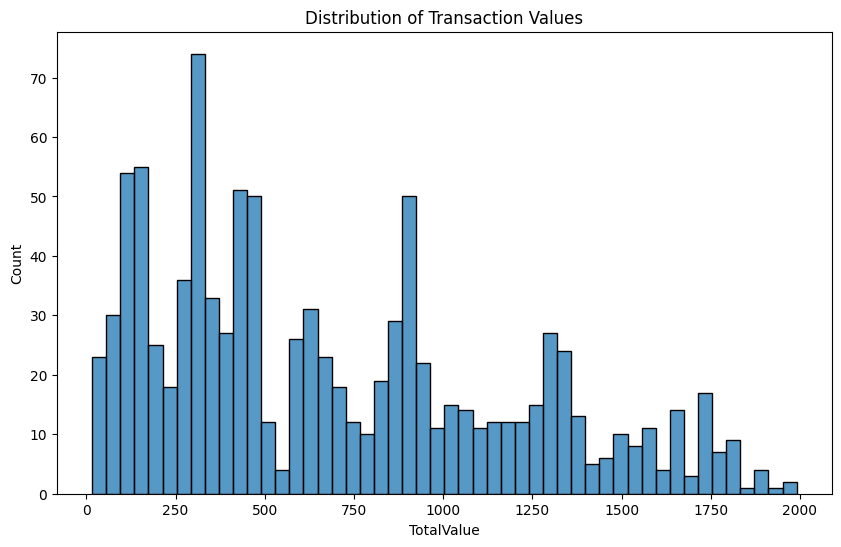

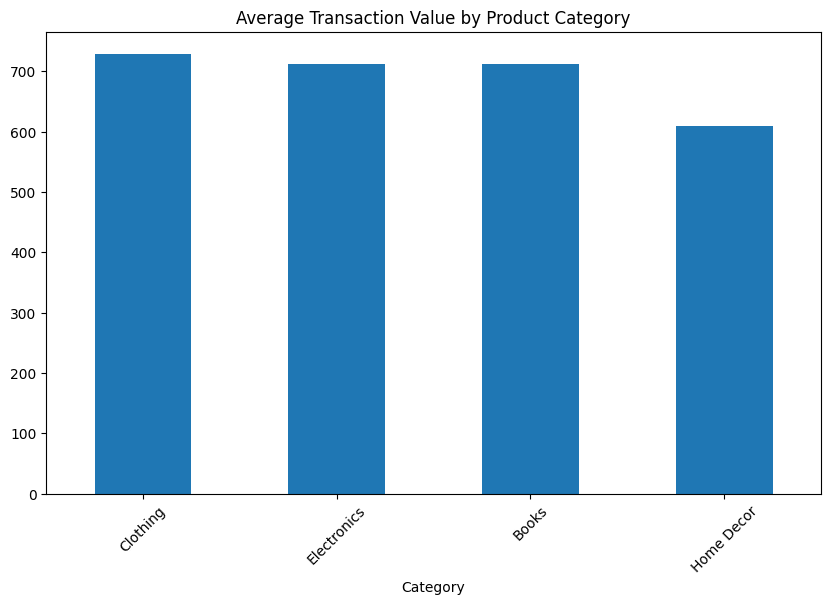

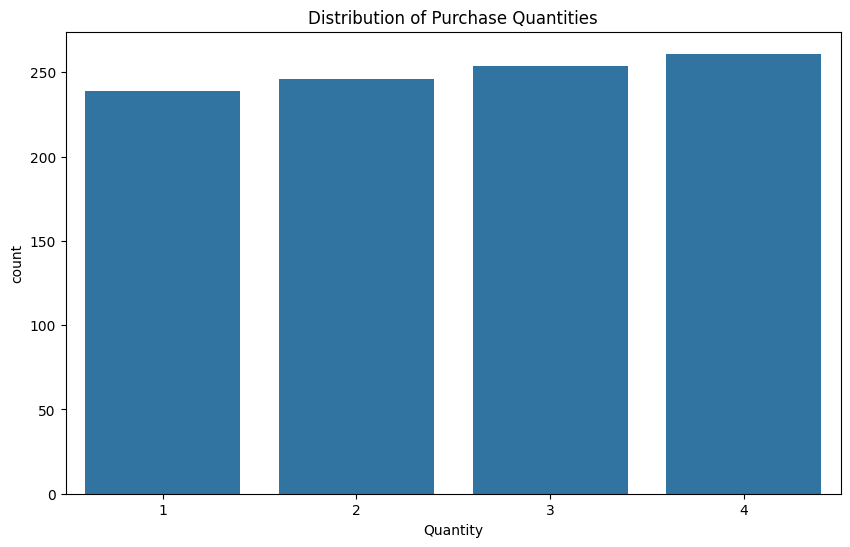

Key Business Insights:
1. Average transaction value: $ 690.0
2. Most common purchase quantity: 4
3. Top selling category by revenue: Books
4. Number of unique customers: 200
5. Number of unique products: 100


In [ ]:
# Let's analyze the data without datetime aggregations first
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# 2. Product Category Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category')
plt.title('Products by Category')
plt.xticks(rotation=45)
plt.show()

# 3. Transaction Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_df, x='TotalValue', bins=50)
plt.title('Distribution of Transaction Values')
plt.show()

# 4. Average Transaction Value by Product Category
trans_prod = transactions_df.merge(products_df, on='ProductID')
avg_value_by_category = trans_prod.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_value_by_category.plot(kind='bar')
plt.title('Average Transaction Value by Product Category')
plt.xticks(rotation=45)
plt.show()

# 5. Quantity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=transactions_df, x='Quantity')
plt.title('Distribution of Purchase Quantities')
plt.show()

# Calculate key business insights
print("\
Key Business Insights:")
print("1. Average transaction value: $", round(transactions_df['TotalValue'].mean(), 2))
print("2. Most common purchase quantity:", transactions_df['Quantity'].mode().values[0])
print("3. Top selling category by revenue:", trans_prod.groupby('Category')['TotalValue'].sum().idxmax())
print("4. Number of unique customers:", customers_df['CustomerID'].nunique())
print("5. Number of unique products:", products_df['ProductID'].nunique())